In [47]:
import pandas as pd

In [48]:
import matplotlib.pyplot as plt

In [76]:
states_H = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

In [77]:
states_H['date'] = pd.to_datetime(states_H['date'], format='%Y%m%d').dt.normalize()

In [79]:
states_H['prev_day_positive'] = states_H['positive'] - states_H['positiveIncrease']

In [80]:
states_H['positive_increase_rate'] = states_H['positiveIncrease'] / states_H['prev_day_positive'] * 100

In [81]:
state = 'NY'

## Trends for the state of {{state}}

In [82]:
state_query = str.format("state == '{}'", state)

In [83]:
state_df = states_H.query(state_query).sort_values(by='date')

### Daily Cumulative Positive Cases

In [86]:
state_df.plot(x='date', y='positive',loglog=False, legend=False, title='Cumulative Positive - Linear')

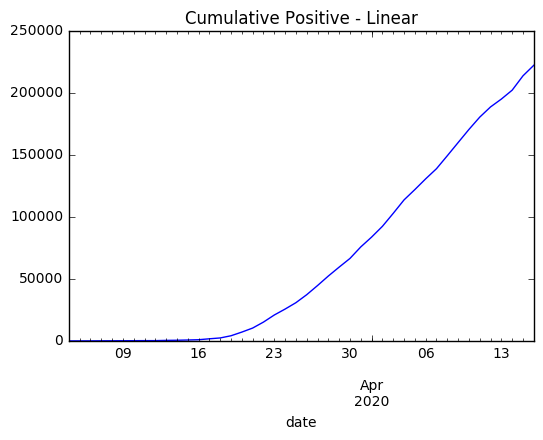

In [87]:
plt.show()

In [113]:
state_df.plot(x='date', y='positive',loglog=True, legend=False, title = 'Cumulative Positive - Logarithmic ')

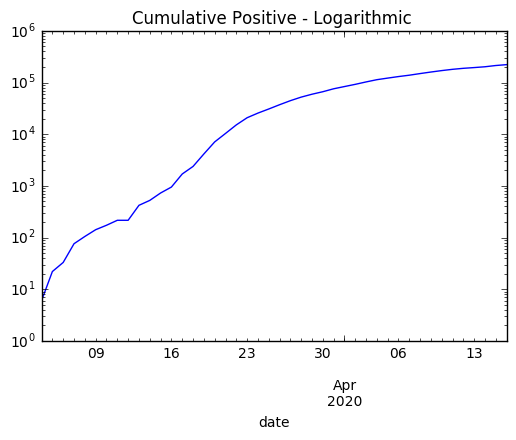

In [114]:
plt.show()

### Daily Cumulative recovered cases

In [96]:
state_df.plot( x='date', y='recovered')

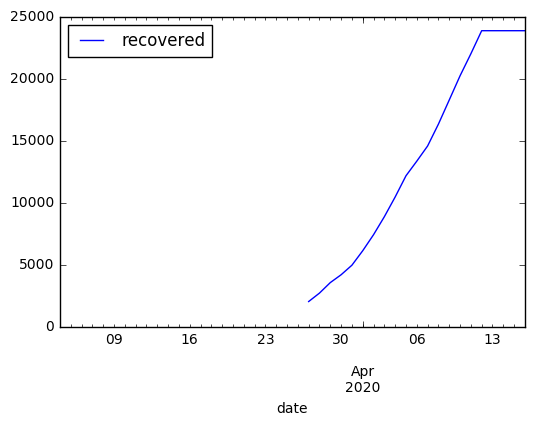

In [97]:
plt.show()

### Daily New Cases in the state of {{state}}

In [100]:
state_df.plot(x='date', y='positiveIncrease', label="Daily Positive Cases", title='Daily')

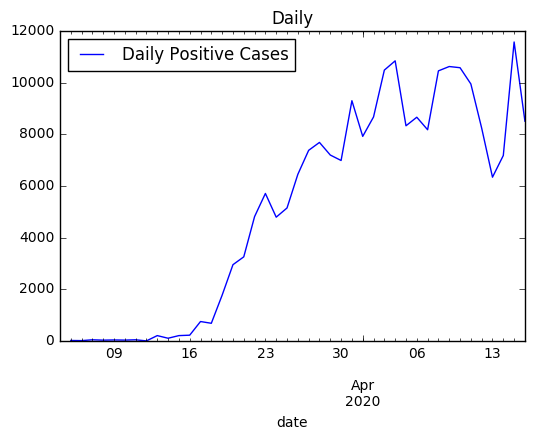

In [101]:
plt.show()

### Daily positive cases increase rate - relative to cumulative positie cases

In [107]:
state_df.plot( x='date', y='positive_increase_rate')

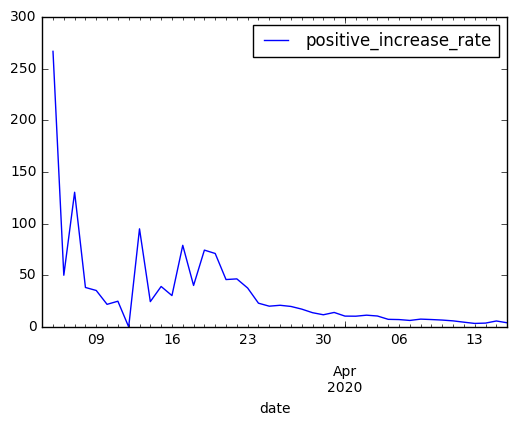

In [108]:
plt.show()